In [1]:
import fastsolver as fs

In [2]:
# 创建一个大小为 3 的向量
v = fs.Vector(3)
v[0] = 1.0
v[1] = 2.0
v[2] = 3.0

# 输出向量和矩阵
print("Vector v:", [v[i] for i in range(v.size())])

Vector v: [1.0, 2.0, 3.0]


In [3]:
# 创建一个稀疏矩阵
A = fs.SparseMatrix(2, 2)
A.addValue(0, 0, 4.0)
A.addValue(0, 1, 1.0)
A.addValue(1, 0, 1.0)
A.addValue(1, 1, 3.0)
A.finalize()

# 创建右侧向量
b = fs.Vector(2)
b[0] = 1.0
b[1] = 2.0

sol = fs.Vector(2)

# 使用共轭梯度法求解
cg = fs.ConjugateGrad(A, b, 100, 1e-6)
cg.solve(sol)

# 输出解
print("Solution x:", [sol[i] for i in range(sol.size())])

Solution x: [0.09090909090909091, 0.6363636363636364]
Iteration 0:
  Residual norm: 0.559017
  Alpha: 0.25
  Solution: [0.25, 0.5]
Iteration 1:
  Residual norm: 0
  Alpha: 0.363636
  Solution: [0.0909091, 0.636364]


In [4]:
import math
# 定义被积函数
def f(x):
    return x ** 2

gauss = fs.GaussQuadrature(5)  # 使用 5 个积分点
a = 0.0
b = 1.0
integral = gauss.integrate(f, a, b)
print("Integral of x^2 from 0 to 1:", integral)

Integral of x^2 from 0 to 1: 0.33333333333333326


In [5]:
import fastsolver as fs

# 定义 ODE 的右侧函数
def f(y):
    result = fs.Vector(2)  # 创建一个大小为 2 的 Vector 对象
    result[0] = -y[1]      # 设置第一个分量
    result[1] = y[0]       # 设置第二个分量
    return result

# 初始条件
y0 = fs.Vector(2)
y0[0] = 1.0
y0[1] = 0.0

# 创建 Runge-Kutta 求解器
rk = fs.RK4()

# 求解 ODE
h = 0.1  # 步长
n = 100  # 步数
rk.solve(y0, f, h, n)

# 输出结果
print("Final state vector:", [y0[i] for i in range(y0.size())])

Final state vector: [-0.8390754644130645, -0.544013766248773]


In [6]:
import fastsolver as fs

# 创建一个稀疏矩阵
A = fs.SparseMatrix(2, 2)
A.addValue(0, 0, 4.0)
A.addValue(0, 1, 1.0)
A.addValue(1, 0, 1.0)
A.addValue(1, 1, 3.0)
A.finalize()

# 创建右侧向量
b = fs.Vector(2)
b[0] = 1.0
b[1] = 2.0

# 初始猜测
x = fs.Vector(2)
x[0] = 0.0
x[1] = 0.0

# 创建多重网格求解器
amg = fs.AlgebraicMultiGrid()

# 执行 V-cycle
levels = 2
smoothing_steps = 10
theta = 0.5
amg.amgVCycle(A, b, x, levels, smoothing_steps, theta)

# 输出结果
print("Solution x:", [x[i] for i in range(x.size())])

Solution x: [0.09090909127908553, 0.6363636362403048]


In [7]:
import fastsolver as fs

# 创建一个稀疏矩阵
A = fs.SparseMatrix(2, 2)
A.addValue(0, 0, 4.0)
A.addValue(0, 1, 1.0)
A.addValue(1, 0, 1.0)
A.addValue(1, 1, 3.0)
A.finalize()

# 创建右侧向量
b = fs.Vector(2)
b[0] = 1.0
b[1] = 2.0

# 初始猜测
x = fs.Vector(2)
x[0] = 0.0
x[1] = 0.0

# 创建 GMRES 求解器
gmres = fs.GMRES()

# 求解线性方程组
max_iter = 100
krylov_dim = 1
tol = 1e-6
gmres.solve(A, b, x, max_iter, krylov_dim, tol)

# 输出结果
print("Solution x:", [x[i] for i in range(x.size())])

Solution x:Initial residual norm:  [0.09090929954188409, 0.6363632987886395]
2.23607
Residual norm after restart: 2.23607 
Residual norm after restart: 1.18291 
Residual norm after restart: 0.693847 
Residual norm after restart: 0.452427 
Residual norm after restart: 0.31443 
Residual norm after restart: 0.226378 
Residual norm after restart: 0.166498 
Residual norm after restart: 0.124291 
Residual norm after restart: 0.0938681 
Residual norm after restart: 0.0715908 
Residual norm after restart: 0.0550732 
Residual norm after restart: 0.0426965 
Residual norm after restart: 0.0333363 
Residual norm after restart: 0.026198 
Residual norm after restart: 0.0207127 
Residual norm after restart: 0.0164679 
Residual norm after restart: 0.0131616 
Residual norm after restart: 0.0105708 
Residual norm after restart: 0.00852909 
Residual norm after restart: 0.0069116 
Residual norm after restart: 0.00562377 
Residual norm after restart: 0.00459361 
Residual norm after restart: 0.00376591 
Res

In [8]:
import fastsolver as fs

# 创建一个稠密矩阵
A = fs.DenseMatrix(2, 2)
A[0, 0] = 4.0
A[0, 1] = 1.0
A[1, 0] = 1.0
A[1, 1] = 3.0

# 创建置换矩阵
P = [0, 0]

# 执行 LU 分解
fs.pivot_lu(A, P)

# 输出 LU 分解结果
print("LU decomposition of A:")
for i in range(A.rows()):
    print([A[i, j] for j in range(A.cols())])

print("Permutation matrix P:")
print(P)

LU decomposition of A:
[4.0, 1.0]
[0.25, 2.75]
Permutation matrix P:
[0, 0]


In [9]:
import fastsolver as fs
import numpy as np

# Load a matrix from SuiteSparse
# A = mmread('../data/bcsstk01/bcsstk01.mtx')

matrix = fs.SparseMatrix(1, 1)
fs.read_matrix_market("../data/bcsstk01/bcsstk01.mtx", matrix)

# # Generate a random exact solution

x_exact = np.random.rand(matrix.cols())
x_ext = fs.Vector(x_exact)

# # Generate a random right-hand side
b = matrix * x_ext




M: 48 N: 48 L: 224
Matrix created 48 48


In [10]:
x = fs.Vector(matrix.cols())
# # Solve the system using GMRES
gmres = fs.GMRES()
# gmres.enablePreconditioner()

# 求解线性方程组
max_iter = 100
krylov_dim = 48
tol = 1e-15
gmres.solve(matrix, b, x, max_iter, krylov_dim, tol)


Initial residual norm: 4.97098e+09
Residual norm after restart: 1.5013e+08 
Residual norm after restart: 9.04124e+07 
Residual norm after restart: 4.61529e+07 
Residual norm after restart: 2.95367e+07 
Residual norm after restart: 2.18395e+07 
Residual norm after restart: 1.8283e+07 
Residual norm after restart: 1.61111e+07 
Residual norm after restart: 1.45002e+07 
Residual norm after restart: 1.31933e+07 
Residual norm after restart: 1.21172e+07 
Residual norm after restart: 1.12545e+07 
Residual norm after restart: 1.0594e+07 
Residual norm after restart: 1.01139e+07 
Residual norm after restart: 9.78124e+06 
Residual norm after restart: 9.55848e+06 
Residual norm after restart: 9.41162e+06 
Residual norm after restart: 9.31429e+06 
Residual norm after restart: 9.24814e+06 
Residual norm after restart: 9.20134e+06 
Residual norm after restart: 9.16655e+06 
Residual norm after restart: 9.13949e+06 
Residual norm after restart: 9.11764e+06 
Residual norm after restart: 9.09945e+06 
Re

In [11]:
res = '''
Residual norm after restart: 2.41763e-06 
Residual norm after restart: 8.73597e-07 
Residual norm after restart: 6.2674e-07 
Residual norm after restart: 6.48845e-07 
Residual norm after restart: 3.2681e-07 
Happy breakdown at iteration 5
Residual norm after restart: 6.66574e-07 
Happy breakdown at iteration 6
Residual norm after restart: 4.95338e-07 
Happy breakdown at iteration 7
Residual norm after restart: 5.09266e-07 
Happy breakdown at iteration 8
Residual norm after restart: 2.98024e-07 
Happy breakdown at iteration 9
Residual norm after restart: 2.98024e-07 
Happy breakdown at iteration 10
Residual norm after restart: 2.98205e-08 
Happy breakdown at iteration 11
Residual norm after restart: 2.38884e-07 
Happy breakdown at iteration 12
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 13
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 14
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 15
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 16
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 17
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 18
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 19
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 20
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 21
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 22
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 23
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 24
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 25
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 26
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 27
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 28
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 29
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 30
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 31
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 32
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 33
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 34
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 35
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 36
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 37
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 38
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 39
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 40
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 41
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 42
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 43
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 44
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 45
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 46
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 47
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 48
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 49
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 50
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 51
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 52
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 53
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 54
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 55
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 56
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 57
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 58
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 59
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 60
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 61
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 62
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 63
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 64
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 65
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 66
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 67
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 68
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 69
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 70
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 71
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 72
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 73
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 74
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 75
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 76
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 77
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 78
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 79
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 80
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 81
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 82
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 83
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 84
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 85
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 86
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 87
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 88
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 89
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 90
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 91
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 92
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 93
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 94
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 95
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 96
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 97
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 98
Residual norm after restart: 1.49012e-08 
Happy breakdown at iteration 99
Residual norm after restart: 1.49012e-08 
'''

In [12]:
res = res.split('\n')
res = [float(i.replace("Residual norm after restart: ", "")) for i in res if i.startswith('Residual')]
res

[2.41763e-06,
 8.73597e-07,
 6.2674e-07,
 6.48845e-07,
 3.2681e-07,
 6.66574e-07,
 4.95338e-07,
 5.09266e-07,
 2.98024e-07,
 2.98024e-07,
 2.98205e-08,
 2.38884e-07,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012e-08,
 1.49012

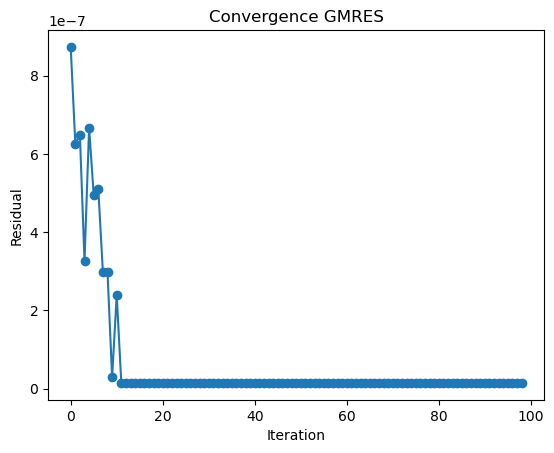

In [13]:
import matplotlib.pyplot as plt

plt.plot(res[1:], '-o')
plt.title('Convergence GMRES')
plt.ylabel('Residual')
plt.xlabel('Iteration')
plt.show()